In [1]:
import earthaccess
import xarray as xr

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
results = earthaccess.search_datasets(instrument="oci")
for item in results[1:20]:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_UVAI_UAA_NRT
PACE_OCI_L2_UVAI_UAA
PACE_OCI_L2_AER_UAA_NRT
PACE_OCI_L2_AER_UAA
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_AOP
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_CLOUD
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_BGC
PACE_OCI_L2_BGC_NRT


In [59]:
# Level 3 data (global)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_LANDVI',
    temporal = ("2024-03-01", "2024-12-31"),
    granule_name="*.MO.*.4km.*"
)
len(results)

10

In [60]:
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/10 [00:00<?, ?it/s]

In [61]:
ds1 = xr.open_dataset(fileset[1])
ds1

<xarray.Dataset> Size: 1GB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (lat, lon) float32 149MB ...
    evi      (lat, lon) float32 149MB ...
    ndwi     (lat, lon) float32 149MB ...
    ndii     (lat, lon) float32 149MB ...
    cci      (lat, lon) float32 149MB ...
    ndsi     (lat, lon) float32 149MB ...
    pri      (lat, lon) float32 149MB ...
    cire     (lat, lon) float32 149MB ...
    car      (lat, lon) float32 149MB ...
    mari     (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20240401_20240430.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         9214922
    data_minimum:                      -687.94495
    data_maximum:                      467.0525

In [62]:
import cartopy
import earthaccess
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [63]:
# We can open all the files but note there is no time coordinate so we need
# combine="nested" and concat_dim
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 15GB
Dimensions:  (time: 10, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 8kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

In [64]:
# Let's add the time coord since we will likely want to subset on time later
import pandas as pd
t = pd.date_range(start="2024-03-01", end="2024-12-31", freq="MS")
ds = ds.assign_coords(time=t)
ds

<xarray.Dataset> Size: 15GB
Dimensions:  (time: 10, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * time     (time) datetime64[ns] 80B 2024-03-01 2024-04-01 ... 2024-12-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 8kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

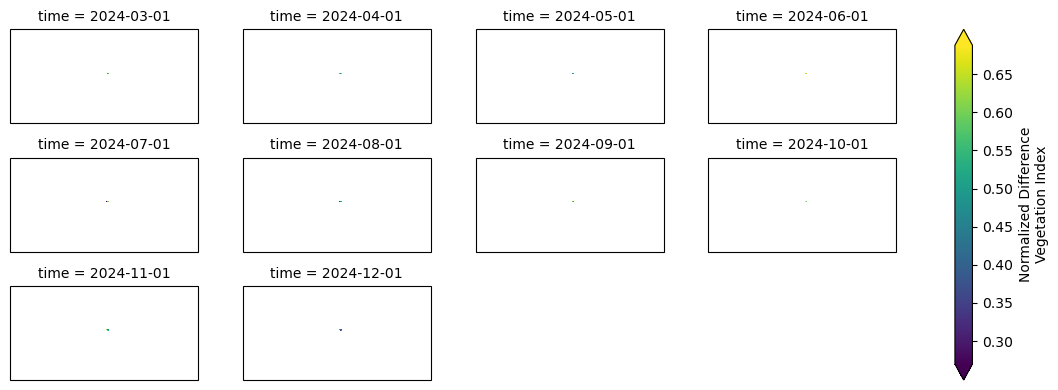

In [65]:
ndvi = ds["ndvi"].sel(
    lat=slice(7.049167, 3.856667),
    lon=slice(3.956111, 9.040000)
)

import cartopy.crs as ccrs
ndvi.plot(
    col="time",            # one panel per month
    col_wrap=4,            # 4 columns per row
    robust=True,           # ignore outliers for color scale
    figsize=(12, 4),
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree()
)

/tmp/ipykernel_292/2723195754.py:21: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flat:


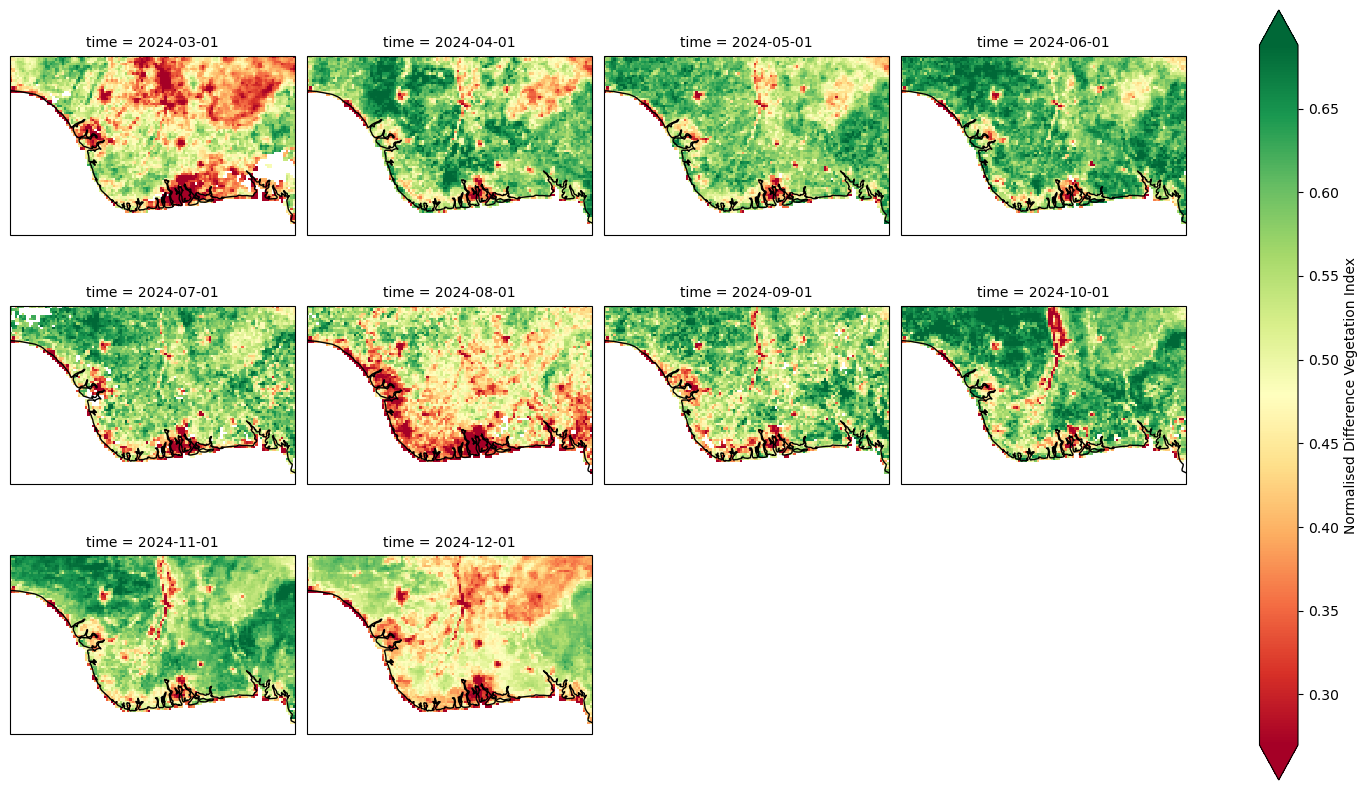

In [73]:
import cartopy.crs as ccrs

ndvi = ds["ndvi"].sel(
    lat=slice(7.049167, 3.856667),   # reverse if lat is descending
    lon=slice(3.956111, 9.040000)
)

g = ndvi.plot(
    col="time",
    col_wrap=4,
    robust=True,
    x="lon",
    y="lat",
    cmap="RdYlGn",
    figsize=(15, 8),
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Normalised Difference Vegetation Index"}
)

for ax in g.axes.flat:
    ax.set_extent(
        [3.956111, 9.040000, 3.856667, 7.049167],
        crs=ccrs.PlateCarree()
    )
    ax.coastlines()


In [2]:
import earthaccess
import xarray as xr
auth = earthaccess.login(persist=True)

In [11]:
# Level 3 data (global)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_LANDVI',
    temporal = ("2025-01-01", "2025-11-30"),
    granule_name="*.MO.*.4km.*"
)
len(results)

11

In [12]:
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/11 [00:00<?, ?it/s]

In [13]:
ds1 = xr.open_dataset(fileset[1])
ds1

<xarray.Dataset> Size: 1GB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (lat, lon) float32 149MB ...
    evi      (lat, lon) float32 149MB ...
    ndwi     (lat, lon) float32 149MB ...
    ndii     (lat, lon) float32 149MB ...
    cci      (lat, lon) float32 149MB ...
    ndsi     (lat, lon) float32 149MB ...
    pri      (lat, lon) float32 149MB ...
    cire     (lat, lon) float32 149MB ...
    car      (lat, lon) float32 149MB ...
    mari     (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20250201_20250228.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10787421
    data_minimum:                      -188.74924
    data_maximum:                      558.2276

In [14]:
import cartopy
import earthaccess
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [15]:
# We can open all the files but note there is no time coordinate so we need
# combine="nested" and concat_dim
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 16GB
Dimensions:  (time: 11, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 8kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20250101_20250131.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         9790131
    data_minimum:                      -23.905025
    data_maximum:                      41.30431

In [16]:
# Let's add the time coord since we will likely want to subset on time later
import pandas as pd
t = pd.date_range(start="2025-01-01", end="2025-11-30", freq="MS")
ds = ds.assign_coords(time=t)
ds

<xarray.Dataset> Size: 16GB
Dimensions:  (time: 11, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * time     (time) datetime64[ns] 88B 2025-01-01 2025-02-01 ... 2025-11-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 8kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20250101_20250131.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         9790131
    data_minimum:                      -23.905025
    data_maximum:                      41.30431

/tmp/ipykernel_1256/1525271184.py:21: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flat:


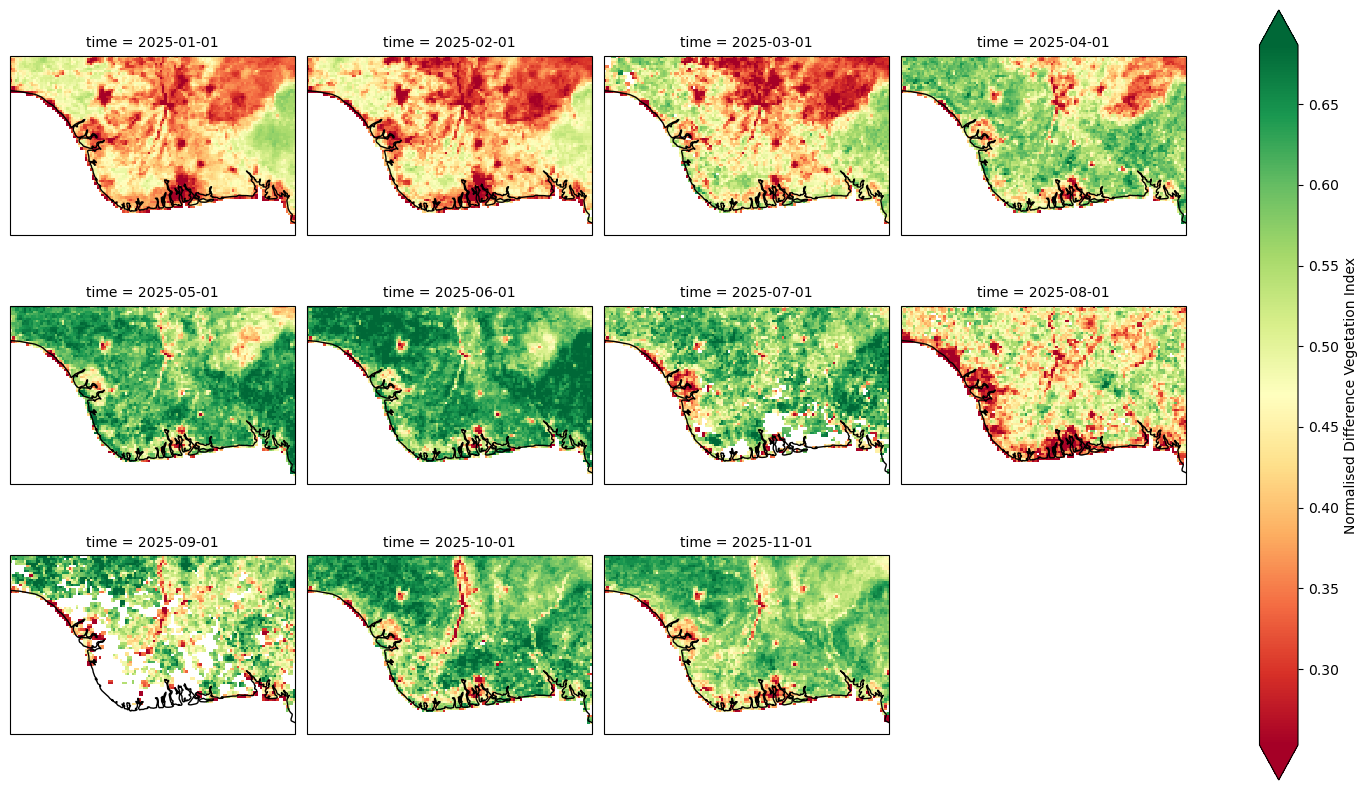

In [17]:
import cartopy.crs as ccrs

ndvi = ds["ndvi"].sel(
    lat=slice(7.049167, 3.856667),   # reverse if lat is descending
    lon=slice(3.956111, 9.040000)
)

g = ndvi.plot(
    col="time",
    col_wrap=4,
    robust=True,
    x="lon",
    y="lat",
    cmap="RdYlGn",
    figsize=(15, 8),
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Normalised Difference Vegetation Index"}
)

for ax in g.axes.flat:
    ax.set_extent(
        [3.956111, 9.040000, 3.856667, 7.049167],
        crs=ccrs.PlateCarree()
    )
    ax.coastlines()